Assignemnt 4.2: (3.1 & 3.2; 4.1 & 4.2)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Question 3.1 
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample. Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children unnder 18 in the household. 

In [30]:
import thinkstats2
import thinkplot
import nsfg

## load data
resp = nsfg.ReadFemResp()

## find pmf for vaiable in question
pmf = thinkstats2.Pmf(resp.numkdhh, label = 'actual_numkdhh')
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual_numkdhh')

Now compute the biased distribution we would see if we see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

In [9]:
biased_pmf = pmf.Copy(label = 'biased_numkdhh')
for x, p in pmf.Items():
    biased_pmf.Mult(x,x)
biased_pmf.Normalize()
biased_pmf

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'biased_numkdhh')

Plot the actual and biased distributions and compute their means.

The actual mean is 1.024205155043831.
The observed mean is 2.403679100664282


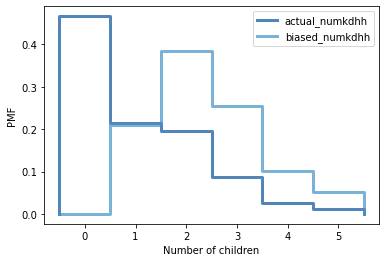

In [19]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel = 'Number of children', ylabel = 'PMF')
print('The actual mean is {}.'.format(pmf.Mean()))
print('The observed mean is {}'.format(biased_pmf.Mean()))

## Question 3.2 
In “Summarizing Distributions” on page 22 we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean but the process is slightly different. 

Write functions called PmfMean and PmfVar that take a PMF object and compute the mean and variance.

In [26]:
def PmfMean(PMF):
    mean = sum(p * x for x, p in PMF.Items())
    return mean
    
    
def PmfVar(PMF, mean = None):
    if mean is None:
        mean = pmf.Mean()
    var = sum(p * (x-mean)**2 for x, p in pmf.Items())
    return var

To test these methods check that they are consistent with the methods Mean and Var provided by Pmf.

In [29]:
print('Mean Comparison:')
print(PmfMean(pmf))
print(pmf.Mean())

print('Variance Comparison:')
print(PmfVar(pmf))
print(pmf.Var())

Mean Comparison:
1.024205155043831
1.024205155043831
Variance Comparison:
1.4128643263531195
1.4128643263531195


## Question 4.1 
How much did you weigh at birth? If you don’t know, call your mother or someone else who knows.
Using the NSFG data (all live births), compute the distributioin of birth weights and use it to find your percentile rank.
If you were a first baby, find your percentile rank in the distribution for first babies. 
Otherwise use the distribution for others. 
If you are in the 90th percentile or higher, call your mother back and apologize. 

In [66]:
# My birthweight was 7lbs, 6oz or 7.375lbs. I was a first child
# My daughter was 8lbs 13oz or 8.8125lbs. She is the first child.

import nsfg

preg = nsfg.ReadFemPreg()
preg.birthord
firsts = preg[preg['birthord'] == 1.0]
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb)

# my birthweight was at the 54.87 percentile rank 
print('My birthweight was at the {} percentile rank.' .format(first_cdf.PercentileRank(7.375)))

# my daughter was at the 90.7 percentile rank
print('My daughter\'s birthweight was at the {} percentile rank.' .format(first_cdf.PercentileRank(8.8125)))

My birthweight was at the 54.870501948200776 percentile rank.
My daughter's birthweight was at the 90.74031629612652 percentile rank.


## Question 4.2 
The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from randon.random and plot their PMF and CDF.
Is the distribution uniform?

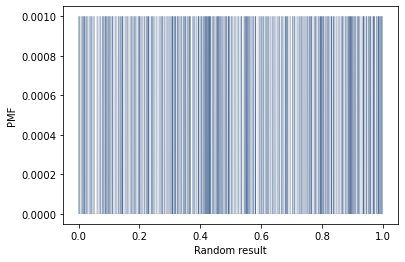

In [69]:
import numpy

# Generate 1000 random numbers
nums = numpy.random.random(1000)

# Plot the PMF
pmf_nums = thinkstats2.Pmf(nums)
thinkplot.Pmf(pmf_nums, linewidth=0.1)
thinkplot.Config(xlabel='Random result', ylabel='PMF')

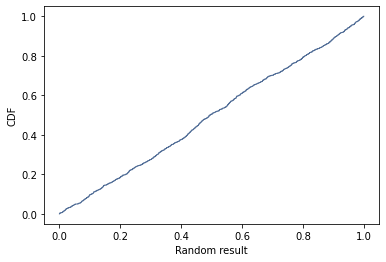

In [72]:
# Plot the CDF
cdf_nums = thinkstats2.Cdf(nums)
thinkplot.Cdf(cdf_nums, linewidth=1)
thinkplot.Config(xlabel='Random result', ylabel='CDF')

Based on the PMF and CDF for the random numbers generated, the distribution is uniform. 